# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [2]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [3]:
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
pd.set_option("display.max_rows",500)
pd.set_option("display.min_rows",None)
rides.cnt.value_counts()


5      260
6      236
4      231
3      224
2      208
7      198
8      182
1      158
10     155
11     147
9      128
12     122
13     113
16     105
17     102
14      97
20      91
21      90
26      90
15      89
28      85
23      81
18      79
24      76
31      75
25      72
27      71
19      69
32      68
36      67
30      67
33      67
35      65
64      64
22      64
29      64
34      60
37      58
90      58
40      58
41      56
50      55
62      55
45      55
69      54
39      54
46      53
86      53
78      52
47      52
106     52
154     51
52      51
123     51
38      51
42      51
59      50
55      50
75      49
70      49
95      49
153     49
54      49
87      48
118     48
114     48
84      48
108     47
56      47
72      47
93      47
44      47
71      47
79      47
57      46
147     46
43      46
124     46
190     46
89      45
48      45
68      45
51      44
116     44
129     44
138     44
92      44
157     44
112     43
102     43
66      43

In [5]:
rides.cnt[rides.cnt>300].value_counts()

308    29
328    28
313    27
332    26
306    26
331    26
302    25
343    24
374    23
305    23
304    23
404    21
315    21
317    21
321    21
314    21
312    21
367    21
337    21
322    20
382    19
334    19
421    19
310    19
323    19
363    19
358    19
362    19
351    18
359    18
385    18
402    18
303    18
316    18
301    17
425    17
360    17
452    17
311    17
377    17
327    17
410    17
373    17
398    17
330    17
361    17
338    17
380    16
347    16
349    16
325    16
309    16
318    16
365    16
383    16
356    16
376    16
420    16
392    15
353    15
320    15
432    15
372    15
354    15
390    15
346    15
342    15
326    15
387    15
355    15
396    14
492    14
336    14
499    14
370    14
335    14
408    14
417    14
333    14
389    14
457    14
319    14
428    14
341    14
495    13
391    13
463    13
407    13
455    13
413    13
381    13
378    13
375    13
350    13
386    13
414    13
416    13
456    13
371    13
513    13


## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days or so in the data set. (Some days don't have exactly 24 entries in the data set, so it's not exactly 10 days.) You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

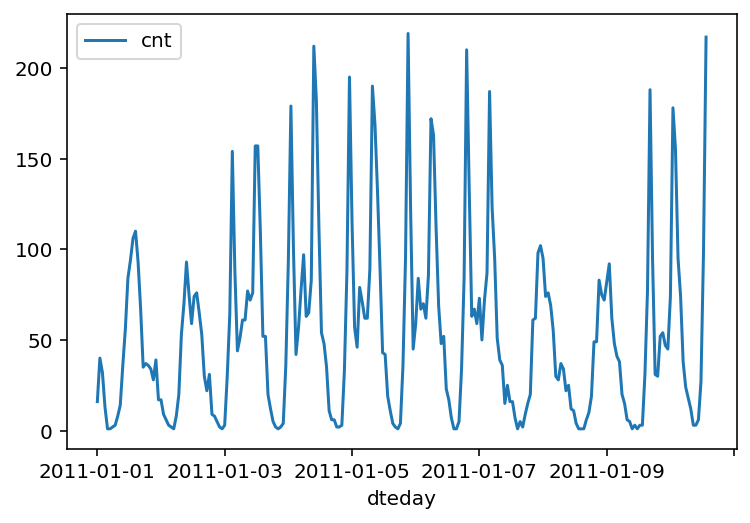

In [6]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [7]:
pd.set_option("display.max_columns",500)
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
data.yr.value_counts()

1    8734
0    8645
Name: yr, dtype: int64

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [9]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 21 days to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [10]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [11]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below you'll build your network. We've built out the structure. You'll implement both the forward pass and backwards pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

<img src="assets/neural_network.png" width=300px>

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

In [12]:
#############
# In the my_answers.py file, fill out the TODO sections as specified
#############

from my_answers import NeuralNetwork

In [13]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [35]:
# weights_input_to_hidden = np.random.normal(0.0, input_nodes**-0.5, 
#                                (self.input_nodes, self.hidden_nodes))

# weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
#                                (self.hidden_nodes, self.output_nodes))
train_features.shape

(15435, 107)

In [17]:
weights_input_to_hidden=np.random.normal(0.0, 1**-0.5, 
                               (1, 2))
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_i_h_T=test_w_i_h.T
print(weights_input_to_hidden.shape)
print(test_w_i_h.shape)
print(test_w_i_h_T.shape)

(1, 2)
(3, 2)
(2, 3)


In [18]:
np.dot(weights_input_to_hidden,test_w_i_h)

ValueError: shapes (1,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [19]:
np.dot(weights_input_to_hidden,test_w_i_h_T).shape

(1, 3)

In [20]:
np.dot(test_w_i_h_T,weights_input_to_hidden)

ValueError: shapes (2,3) and (1,2) not aligned: 3 (dim 1) != 1 (dim 0)

In [21]:
hidden_outputs=np.dot(weights_input_to_hidden,test_w_i_h_T)

In [22]:
hidden_outputs.shape

(1, 3)

In [23]:
activation_function = lambda x : 1/(1+np.exp(-x))
activation_function(hidden_outputs).T.shape

(3, 1)

In [24]:
weights_hidden_to_output = np.random.normal(0.0, 2**-0.5, 
                               (2, 1))
weights_hidden_to_output_T=weights_hidden_to_output.T
print(weights_hidden_to_output.shape)
print(weights_hidden_to_output_T.shape)

(2, 1)
(1, 2)


In [25]:
#Replicate what is being done in the function: create the exact same values here so can just pass them back
#Need x and the weights
inputs = np.array([[0.5, -0.2, 0.1]])
input_nodes=3
hidden_nodes=2

test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

# weights_input_to_hidden = np.random.normal(0.0, input_nodes**-0.5, 
#                                (input_nodes, hidden_nodes))
# weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
#                                (self.hidden_nodes, self.output_nodes))
weights_input_to_hidden = test_w_i_h.copy()
weights_hidden_to_output = test_w_h_o.copy()

hidden_inputs = inputs.T # signals into hidden layer
hidden_outputs = np.dot(weights_input_to_hidden.T,hidden_inputs) # signals from hidden layer

# TODO: Output layer - Replace these values with your calculations.
final_inputs = activation_function(hidden_outputs) # signals into final output layer
#         weights_h_o_T=self.weights_hidden_to_output.T
final_outputs = np.dot(final_inputs.T,weights_hidden_to_output) # signals from final output layer

In [26]:
print(final_inputs.shape)
print(weights_hidden_to_output.shape)

(2, 1)
(2, 1)


In [27]:
final_outputs

array([[0.09998924]])

In [28]:
targets = np.array([[0.4]])
final_outputs.shape
# final_inputs
# hidden_outputs[:,None].shape
# print(weights_hidden_to_output.T.shape)
# print(hidden_outputs.shape)
# targets-final_outputs

(1, 1)

In [29]:
print(weights_input_to_hidden.T.shape)
print(hidden_inputs.shape)
inputs.shape

(2, 3)
(3, 1)


(1, 3)

In [30]:
lr=0.5
error = targets-final_outputs # Output layer error is the difference between desired target and actual output.

# TODO: Calculate the hidden layer's contribution to the error
hidden_error = weights_hidden_to_output.dot(error)

# TODO: Backpropagated error terms - Replace these values with your calculations.
output_error_term = error

hidden_error_term = hidden_error*hidden_outputs*(1-hidden_outputs)
    #could be here that this is the wrong way around because there is no sigmoid there

# Weight step (input to hidden)
delta_weights_i_h = inputs.T.dot(hidden_error_term.T)
# Weight step (hidden to output)
delta_weights_h_o = hidden_outputs.dot(output_error_term)

In [31]:
error

array([[0.30001076]])

In [32]:
delta_weights_h_o*lr

array([[-0.00900032],
       [-0.02700097]])

In [33]:
weights_hidden_to_output

array([[ 0.3],
       [-0.1]])

In [34]:
weights_hidden_to_output-delta_weights_h_o*lr
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))

IndentationError: unexpected indent (<ipython-input-34-2cefd022b638>, line 2)

In [35]:
weights_hidden_to_output.shape

(2, 1)

In [36]:
delta_weights_i_h = np.zeros(weights_input_to_hidden.shape)
print(delta_weights_i_h.shape)
delta_weights_h_o = np.zeros(weights_hidden_to_output.shape)

(3, 2)


In [37]:
inputs.shape

(1, 3)

In [38]:
hidden_error_term

array([[-0.00572421],
       [ 0.00637223]])

In [39]:
hidden_error = error.dot(weights_hidden_to_output.T)
print(hidden_error.shape)
hidden_error2 = weights_hidden_to_output.dot(error)
print(hidden_error2.shape)

(1, 2)
(2, 1)


## Unit tests

Run these unit tests to check the correctness of your network implementation. This will help you be sure your network was implemented correctly befor you starting trying to train it. These tests must all be successful to pass the project.

In [41]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....

HERROR [ 0.09000323 -0.03000108]
delta_weights_i_h [[ 0.01124028 -0.00371992]
 [-0.00449611  0.00148797]
 [ 0.00224806 -0.00074398]]
delta_weights_h_o [[0.14550657]
 [0.13654123]]



----------------------------------------------------------------------
Ran 5 tests in 0.006s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In [139]:
hidden_outputs

array([[-0.06],
       [-0.18]])

## Training the network

Here you'll set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently. You'll learn more about SGD later.

### Choose the number of iterations
This is the number of batches of samples from the training data we'll use to train the network. The more iterations you use, the better the model will fit the data. However, this process can have sharply diminishing returns and can waste computational resources if you use too many iterations.  You want to find a number here where the network has a low training loss, and the validation loss is at a minimum. The ideal number of iterations would be a level that stops shortly after the validation loss is no longer decreasing.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. Normally a good choice to start at is 0.1; however, if you effectively divide the learning rate by n_records, try starting out with a learning rate of 1. In either case, if the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
In a model where all the weights are optimized, the more hidden nodes you have, the more accurate the predictions of the model will be.  (A fully optimized model could have weights of zero, after all.) However, the more hidden nodes you have, the harder it will be to optimize the weights of the model, and the more likely it will be that suboptimal weights will lead to overfitting. With overfitting, the model will memorize the training data instead of learning the true pattern, and won't generalize well to unseen data.  

Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.  You'll generally find that the best number of hidden nodes to use ends up being between the number of input and output nodes.

In [51]:
!pip install pandas==0.25.1
import pandas as pd

  Using cached pandas-0.25.1.tar.gz (12.6 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3
    Running setup.py install for pandas: started
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\james\anaconda3\envs\deep_learning\lib\site-packages\pandas-1.0.3.dist-info\
   from C:\Users\james\anaconda3\envs\deep_learning\Lib\site-packages\~andas-1.0.3.dist-info
  Moving to c:\users\james\anaconda3\envs\deep_learning\lib\site-packages\pandas\
   from C:\Users\james\anaconda3\envs\deep_learning\Lib\site-packages\~andas


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\james\anaconda3\envs\deep_learning\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\james\\AppData\\Local\\Temp\\pip-install-iviskjdk\\pandas\\setup.py'"'"'; __file__='"'"'C:\\Users\\james\\AppData\\Local\\Temp\\pip-install-iviskjdk\\pandas\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\james\AppData\Local\Temp\pip-wheel-clnta93p'
       cwd: C:\Users\james\AppData\Local\Temp\pip-install-iviskjdk\pandas\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\testing.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\_typing.p

  copying pandas\core\arrays\array_.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\base.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\categorical.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\datetimelike.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\datetimes.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\integer.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\interval.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\numpy_.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\period.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\sparse.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\timedeltas.py -> build\lib.win-amd64-3.8\pandas\core\arrays
  copying pandas\core\arrays\_ranges.py -> bui

In [52]:
import sys

####################
### Set the hyperparameters in you myanswers.py file ###
####################

from my_answers import iterations, learning_rate, hidden_nodes, output_nodes


N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

AttributeError: 'DataFrame' object has no attribute 'ix'

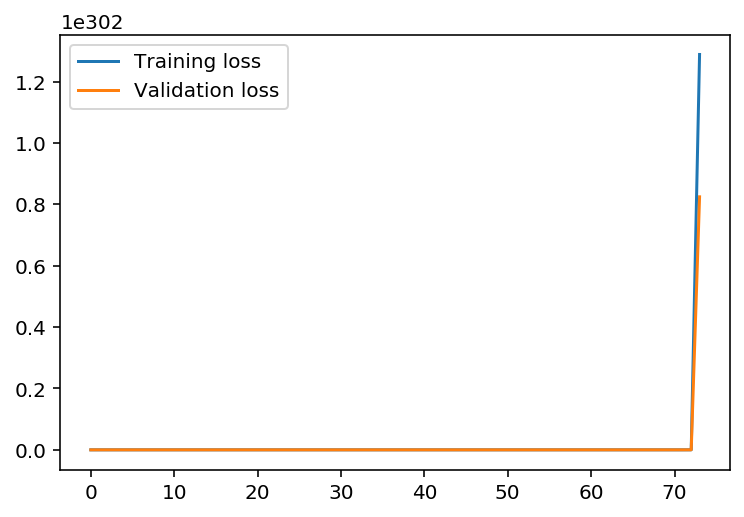

In [46]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

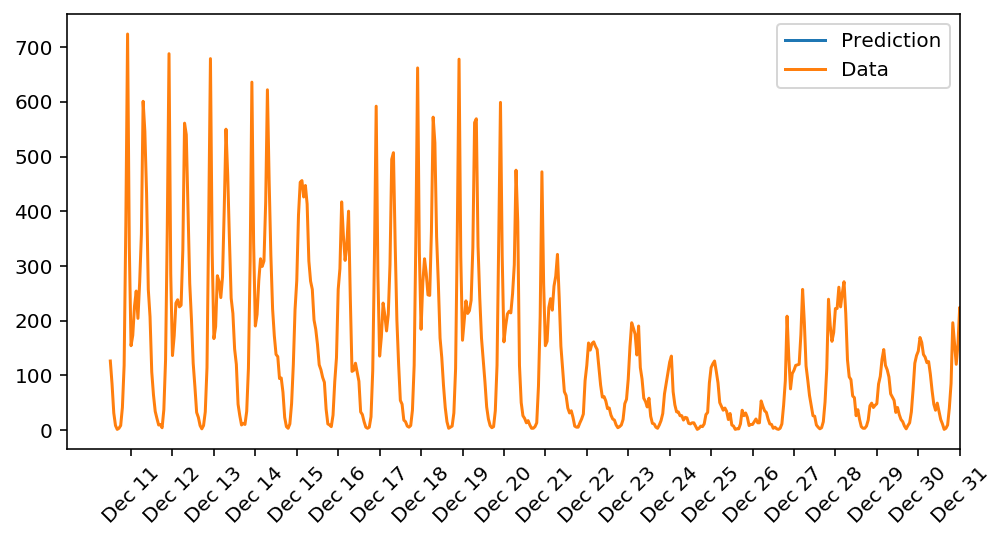

In [48]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## OPTIONAL: Thinking about your results(this question will not be evaluated in the rubric).
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Your answer below